# MVAR Simulation for Microbiota and Metabolites

### MVAR Process

The MVAR model extends the traditional VAR model used to fit abundances over time, by incorporating metabolites. The model can be expressed as follows:

$$ X_t = A \cdot X_{t-1} + \epsilon_{X,t} $$
$$ S_t = B \cdot X_{t-1} + \epsilon_{S,t} $$

where:
- $X_t$ is the vector of microbiota abundances at time $t$,
- $S_t$ is the vector of metabolite abundances at time $t$,
- $A$ and $B$ are matrices representing the interactions within microbiota and between microbiota and metabolites, respectively,
- $\epsilon_{X,t}$ and $\epsilon_{S,t}$ are vectors of error terms, assumed to be normally distributed with mean 0 and a specific standard deviation.

### Objective

The objective of this notebook is to simulate the dynamics between microbiota and metabolites using the MVAR model. Through simulation, we aim to demonstrate how specific interactions can be identified and quantified, providing insights into the causal relationships within these systems.

### Simulation with `VARsim.py` for sVAR Models

The `VARsim.py` script has been adapted to support MVAR simulation, allowing us to specify metabolite interaction matrices and simulate the dynamics of microbiota and metabolites over time. This section demonstrates how to use the script for simulating and visualizing the interactions captured by our MVAR model.


### Example Usage of `VARsim.py` for MVAR Simulation

The implementation of the VAR model in `VARsim.py` allows for detailed simulation of the dynamic interactions between microbiota and their produced metabolites. The script is designed to facilitate straightforward simulation of these complex biological systems. The following code examples provide a guide on how to leverage the `VARsim.py` script to simulate these interactions effectively:


In [1]:
# Importing the libraries
from mimic.model_simulate.sim_VAR import *
from mimic.model_infer.infer_VAR_bayes import *

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


First, let's first generate synthetic data for microbiota using the sim_VAR class. We will then simulate the sparse interaction with a given matrix

In [2]:
# Simulate a VAR model

simulator = sim_VAR()

We can now use the following parameters to generate the metabolic data:

```json
{
    "coefficientsM": [
        [
            0.0,
            -0.5,
            0.0
        ],
        [
            0.1,
            0.1,
            -0.1
        ],
        [
            -0.2,
            0.1,
            0.3
        ]
    ],
    "initial_valuesM": [
        [
            2
        ],
        [
            0
        ],
        [
            0
        ]
    ]
}

In [3]:
simulator.read_parameters(r'parametersS.json')
simulator.print_parameters()

Model parameters:
Model: VAR
n_obs: 97
coefficients: [[ 0.8 -0.2  0.3]
 [ 0.3  0.5 -1. ]
 [ 0.2 -0.1  0.4]]
initial_values: [[1]
 [2]
 [0]]
noise_stddev: 1.2
output: show
coefficientsM: [[ 0.  -0.5  0. ]
 [ 0.1  0.1 -0.1]
 [-0.2  0.1  0.3]]
initial_valuesM: [[2]
 [0]
 [0]]


Using the following parameters for sVAR simulation: {'n_obs': 97, 'coefficients': array([[ 0.8, -0.2,  0.3],
       [ 0.3,  0.5, -1. ],
       [ 0.2, -0.1,  0.4]]), 'initial_values': array([[1],
       [2],
       [0]]), 'noise_stddev': 1.2, 'output': 'show', 'coefficientsM': array([[ 0. , -0.5,  0. ],
       [ 0.1,  0.1, -0.1],
       [-0.2,  0.1,  0.3]]), 'initial_valuesM': array([[2],
       [0],
       [0]])}


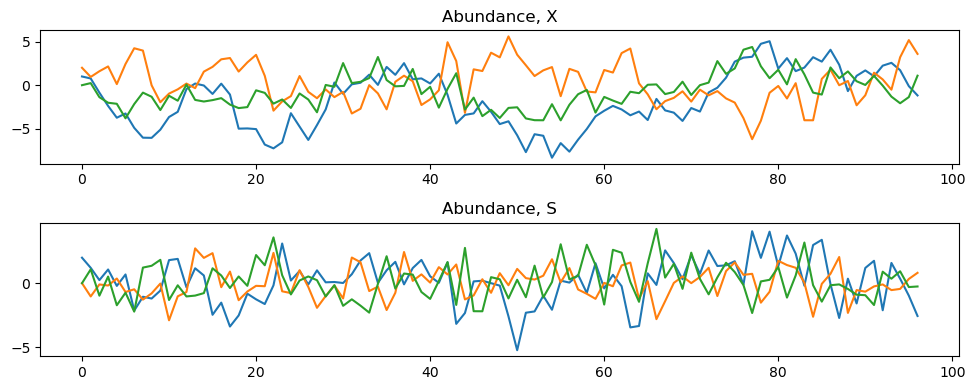

In [4]:
simulator.simulate('MVARsim')

In [5]:
data = simulator.data
print(data)

[[ 1.00000000e+00  2.00000000e+00  0.00000000e+00]
 [ 7.71851444e-01  9.47395412e-01  2.39128541e-01]
 [-8.58459939e-01  1.60173843e+00 -1.37650283e+00]
 [-2.38027867e+00  2.15155688e+00 -2.01468173e+00]
 [-3.73363331e+00  1.25779524e-01 -2.13408395e+00]
 [-3.24361296e+00  2.43518635e+00 -3.79960299e+00]
 [-4.89353691e+00  4.23686712e+00 -2.16491850e+00]
 [-6.02276404e+00  3.97118937e+00 -8.52549445e-01]
 [-6.04156101e+00 -1.44421507e-02 -1.32821916e+00]
 [-5.10570396e+00 -1.95483632e+00 -2.85303524e+00]
 [-3.65107117e+00 -9.65147868e-01 -1.21224721e+00]
 [-3.05628983e+00 -4.77603982e-01 -1.77874510e+00]
 [-4.48344841e-01  1.86108969e-01  6.78969655e-02]
 [ 1.89522755e-01 -3.40287970e-01 -1.68903684e+00]
 [-3.59502417e-02  1.55581080e+00 -1.87260987e+00]
 [-1.00308421e+00  2.10227893e+00 -1.71301567e+00]
 [ 1.75359084e-01  2.96975468e+00 -1.48665452e+00]
 [-1.07512520e+00  3.11632197e+00 -2.22603245e+00]
 [-4.98749317e+00  1.56224475e+00 -2.62756719e+00]
 [-4.96086036e+00  2.61574094e+

In [6]:
dataM = simulator.dataM
print(dataM)

[[ 2.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.20675937e+00 -1.03692268e+00  1.08452564e+00]
 [ 2.42167521e-01 -9.72424051e-02 -9.75854292e-01]
 [ 1.07510178e+00 -1.80632240e-01  5.20866821e-01]
 [-2.10808435e-01  3.67010841e-01 -1.72639969e+00]
 [ 6.85458757e-01 -6.88743165e-01 -7.42434366e-01]
 [-2.14557373e+00 -4.77048819e-01 -2.22589038e+00]
 [-1.06082311e+00 -1.28581356e+00  1.22381378e+00]
 [-1.20030839e+00 -7.95079492e-01  1.36592175e+00]
 [-5.79507897e-01 -2.84620279e-02  1.83198345e+00]
 [ 1.81008074e+00 -2.90510914e+00 -1.31624632e+00]
 [ 1.90583477e+00 -1.02733025e+00 -1.63813580e-01]
 [-3.15190397e-01 -6.92433918e-01 -1.03682518e+00]
 [ 1.16981702e+00  2.73042150e+00 -9.69837282e-01]
 [ 6.06474727e-01  1.98461503e+00 -7.77179653e-01]
 [-2.47442741e+00  2.35563540e+00  1.16819826e+00]
 [-1.52165865e+00 -3.11277596e-01  6.05416500e-01]
 [-3.39448333e+00  9.11823505e-01 -3.75088040e-01]
 [-2.52547202e+00 -1.33106736e+00  5.28181266e-01]
 [-8.20344570e-01 -6.52130274e-

In [7]:
infer = infer_VAR(data=data, dataS=dataM)

In [8]:
infer.run_inference_xs()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [X0h, S0h, Ah, Bh, sigma]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 29 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Ah[0, 0]  0.721  0.046   0.632    0.806      0.001    0.001    3113.0   
Ah[0, 1] -0.223  0.056  -0.323   -0.113      0.001    0.001    3503.0   
Ah[0, 2]  0.385  0.090   0.225    0.561      0.002    0.001    3522.0   
Ah[1, 0]  0.397  0.039   0.327    0.473      0.001    0.000    3644.0   
Ah[1, 1]  0.439  0.050   0.342    0.529      0.001    0.001    4183.0   
Ah[1, 2] -1.096  0.075  -1.233   -0.958      0.001    0.001    3393.0   
Ah[2, 0]  0.209  0.049   0.121    0.307      0.001    0.001    2927.0   
Ah[2, 1] -0.071  0.057  -0.176    0.045      0.001    0.001    1529.0   
Ah[2, 2]  0.404  0.091   0.235    0.579      0.002    0.001    2130.0   
Bh[0, 0]  0.183  0.272  -0.361    0.667      0.007    0.005    1690.0   
Bh[0, 1] -0.678  0.141  -0.958   -0.431      0.003    0.002    2147.0   
Bh[0, 2] -0.463  0.679  -1.785    0.802      0.017    0.012    1695.0   
Bh[1, 0]  0.349  0.273  -0.181    0.899      0.008 

           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Ah[0, 0]  0.721  0.046   0.632    0.806      0.001    0.001    3113.0   
Ah[0, 1] -0.223  0.056  -0.323   -0.113      0.001    0.001    3503.0   
Ah[0, 2]  0.385  0.090   0.225    0.561      0.002    0.001    3522.0   
Ah[1, 0]  0.397  0.039   0.327    0.473      0.001    0.000    3644.0   
Ah[1, 1]  0.439  0.050   0.342    0.529      0.001    0.001    4183.0   
Ah[1, 2] -1.096  0.075  -1.233   -0.958      0.001    0.001    3393.0   
Ah[2, 0]  0.209  0.049   0.121    0.307      0.001    0.001    2927.0   
Ah[2, 1] -0.071  0.057  -0.176    0.045      0.001    0.001    1529.0   
Ah[2, 2]  0.404  0.091   0.235    0.579      0.002    0.001    2130.0   
Bh[0, 0]  0.183  0.272  -0.361    0.667      0.007    0.005    1690.0   
Bh[0, 1] -0.678  0.141  -0.958   -0.431      0.003    0.002    2147.0   
Bh[0, 2] -0.463  0.679  -1.785    0.802      0.017    0.012    1695.0   
Bh[1, 0]  0.349  0.273  -0.181    0.899      0.008 

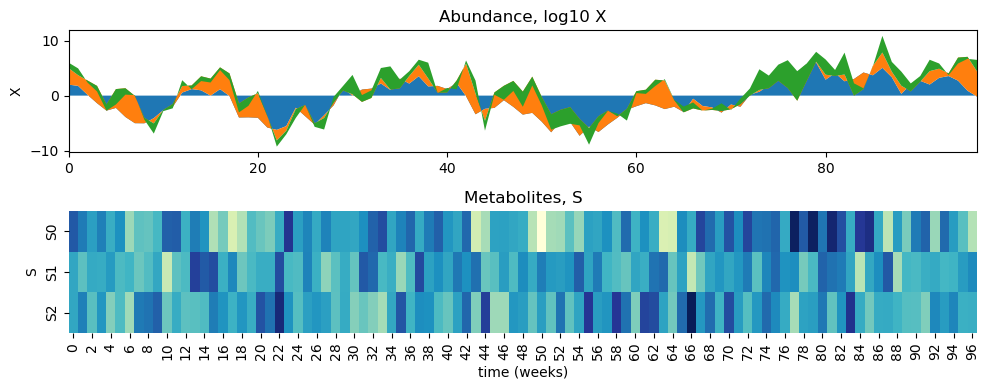

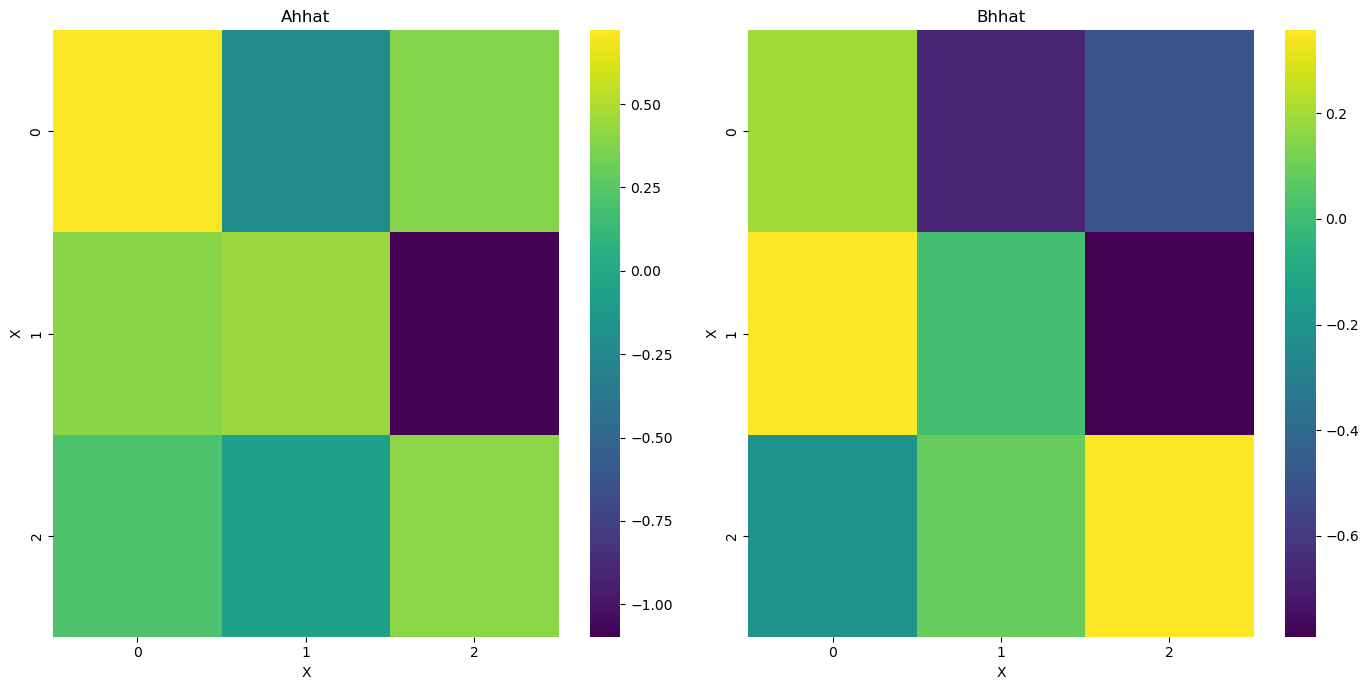

In [9]:
infer.posterior_analysis()

In [10]:
# we can also plot the results with the original paremetr values that we used to simulate the data

A = np.array([[0.8, -0.2,  0.3],
              [0.3,  0.5, -1.],
              [0.2, -0.1,  0.4]])

B = np.array([[0.,  -0.5,  0.],
              [0.1, 0.1, -0.1],
              [-0.2, 0.1, 0.3]])

           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Ah[0, 0]  0.721  0.046   0.632    0.806      0.001    0.001    3113.0   
Ah[0, 1] -0.223  0.056  -0.323   -0.113      0.001    0.001    3503.0   
Ah[0, 2]  0.385  0.090   0.225    0.561      0.002    0.001    3522.0   
Ah[1, 0]  0.397  0.039   0.327    0.473      0.001    0.000    3644.0   
Ah[1, 1]  0.439  0.050   0.342    0.529      0.001    0.001    4183.0   
Ah[1, 2] -1.096  0.075  -1.233   -0.958      0.001    0.001    3393.0   
Ah[2, 0]  0.209  0.049   0.121    0.307      0.001    0.001    2927.0   
Ah[2, 1] -0.071  0.057  -0.176    0.045      0.001    0.001    1529.0   
Ah[2, 2]  0.404  0.091   0.235    0.579      0.002    0.001    2130.0   
Bh[0, 0]  0.183  0.272  -0.361    0.667      0.007    0.005    1690.0   
Bh[0, 1] -0.678  0.141  -0.958   -0.431      0.003    0.002    2147.0   
Bh[0, 2] -0.463  0.679  -1.785    0.802      0.017    0.012    1695.0   
Bh[1, 0]  0.349  0.273  -0.181    0.899      0.008 

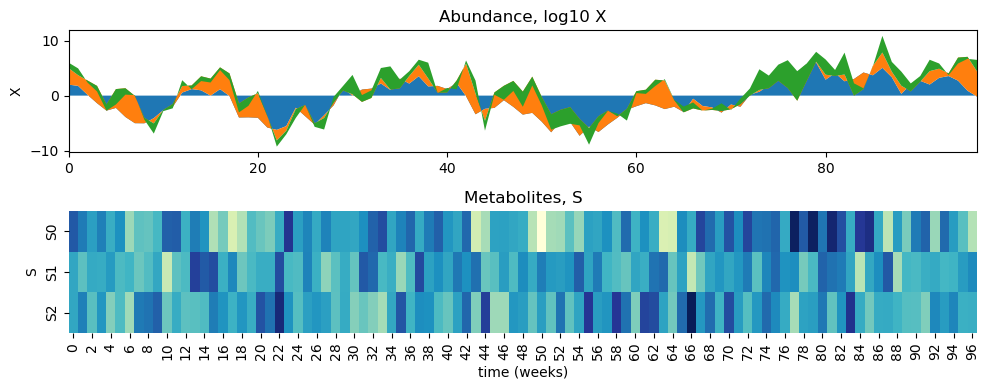

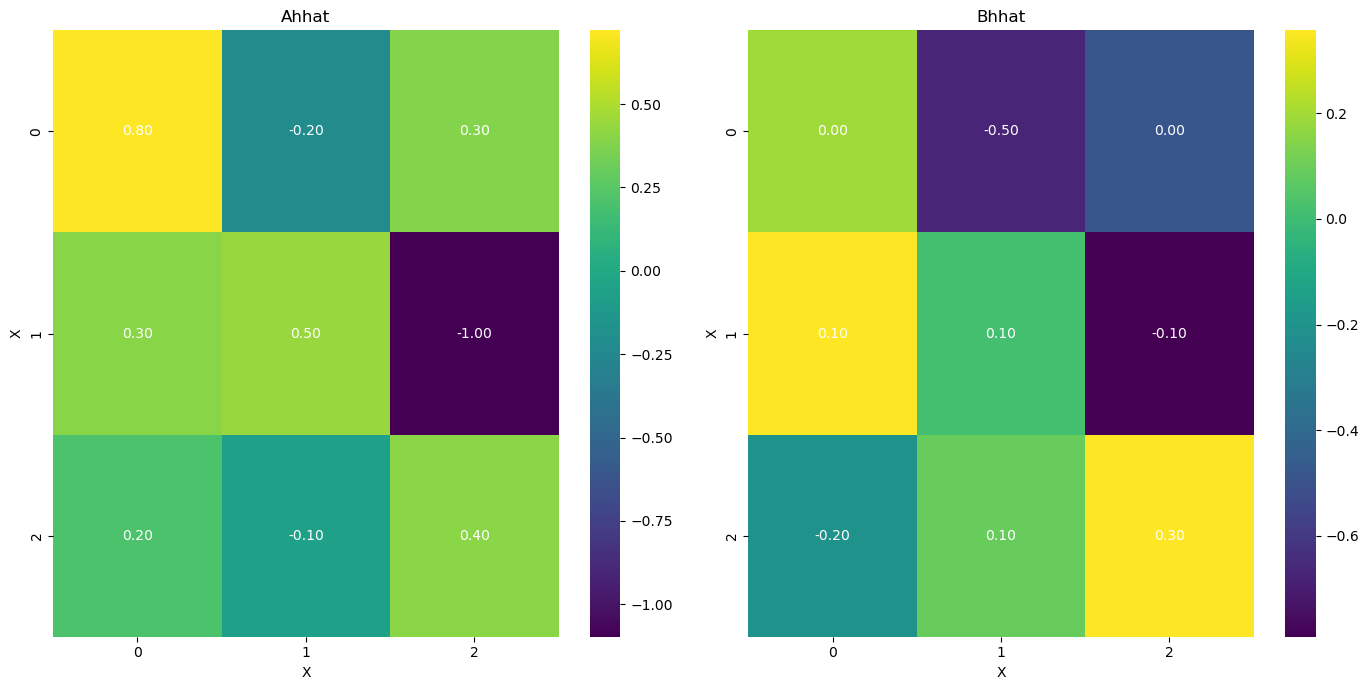

In [11]:
infer.posterior_analysis(A, B)

In [12]:
infer2 = infer_VAR(data=data, dataS=dataM)

In [13]:
infer2.run_inference_large_xs()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c2_A, tau_A, lam_A, Ah, c2_B, tau_B, lam_B, Bh, sigma]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 146 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 4119 divergences after tuning. Increase `target_accept` or reparameterize.


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Ah[0, 0]  0.729  0.034   0.664    0.792      0.002    0.001     406.0   
Ah[0, 1] -0.220  0.045  -0.303   -0.137      0.001    0.001    1290.0   
Ah[0, 2]  0.382  0.065   0.259    0.506      0.002    0.002     716.0   
Ah[1, 0]  0.397  0.028   0.343    0.451      0.001    0.000    2454.0   
Ah[1, 1]  0.458  0.035   0.391    0.521      0.002    0.002     273.0   
Ah[1, 2] -1.076  0.061  -1.186   -0.974      0.009    0.006      54.0   
Ah[2, 0]  0.208  0.036   0.144    0.281      0.001    0.001    2263.0   
Ah[2, 1] -0.062  0.045  -0.154    0.014      0.001    0.001    1342.0   
Ah[2, 2]  0.402  0.070   0.271    0.528      0.007    0.005      94.0   
Bh[0, 0]  0.006  0.036  -0.053    0.065      0.001    0.001    1195.0   
Bh[0, 1] -0.602  0.057  -0.717   -0.504      0.002    0.002     582.0   
Bh[0, 2] -0.008  0.088  -0.154    0.118      0.005    0.003      67.0   
Bh[1, 0]  0.054  0.093  -0.032    0.257      0.005 

           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Ah[0, 0]  0.729  0.034   0.664    0.792      0.002    0.001     406.0   
Ah[0, 1] -0.220  0.045  -0.303   -0.137      0.001    0.001    1290.0   
Ah[0, 2]  0.382  0.065   0.259    0.506      0.002    0.002     716.0   
Ah[1, 0]  0.397  0.028   0.343    0.451      0.001    0.000    2454.0   
Ah[1, 1]  0.458  0.035   0.391    0.521      0.002    0.002     273.0   
Ah[1, 2] -1.076  0.061  -1.186   -0.974      0.009    0.006      54.0   
Ah[2, 0]  0.208  0.036   0.144    0.281      0.001    0.001    2263.0   
Ah[2, 1] -0.062  0.045  -0.154    0.014      0.001    0.001    1342.0   
Ah[2, 2]  0.402  0.070   0.271    0.528      0.007    0.005      94.0   
Bh[0, 0]  0.006  0.036  -0.053    0.065      0.001    0.001    1195.0   
Bh[0, 1] -0.602  0.057  -0.717   -0.504      0.002    0.002     582.0   
Bh[0, 2] -0.008  0.088  -0.154    0.118      0.005    0.003      67.0   
Bh[1, 0]  0.054  0.093  -0.032    0.257      0.005 

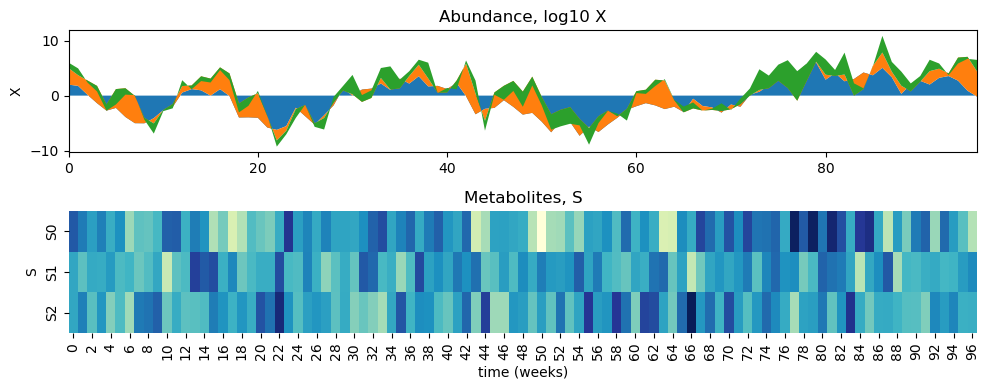

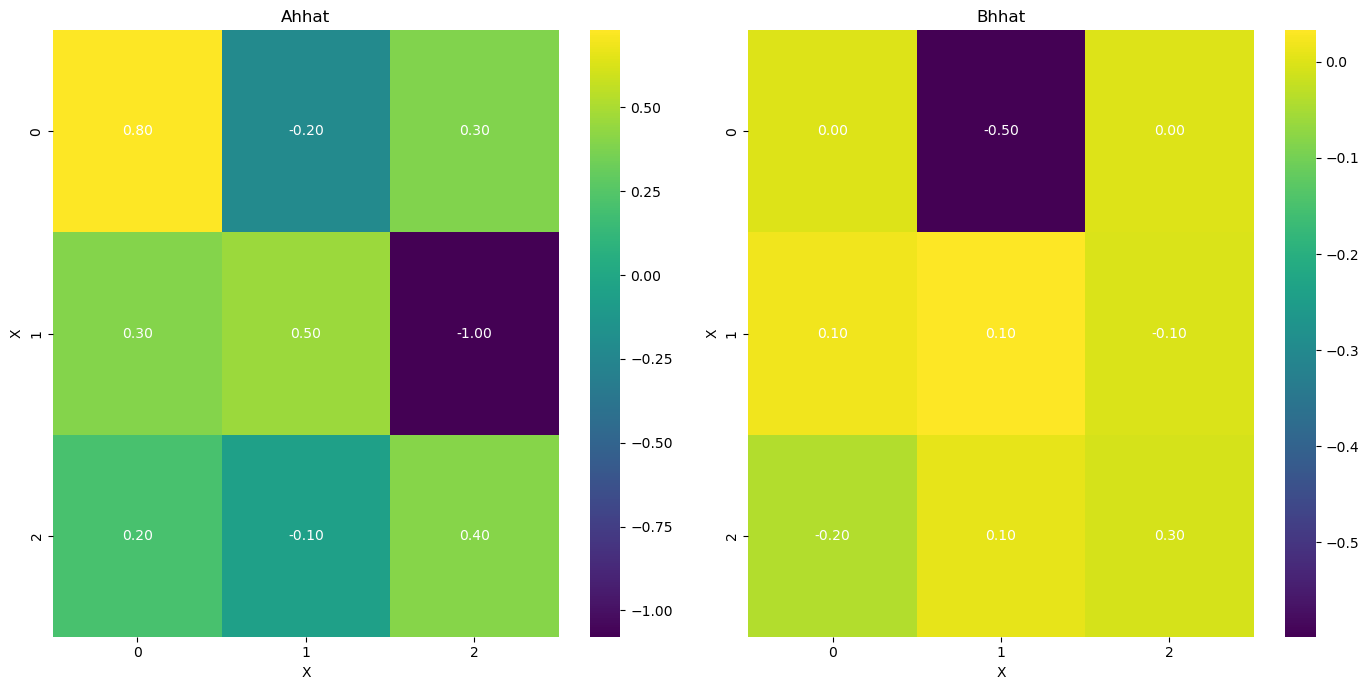

In [14]:
infer2.posterior_analysis(A, B)